In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [28]:
conn = sqlite3.connect('task_7_data.db')
cursor = conn.cursor()

In [29]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    P_ID INTEGER ,
    Quantity INTEGER,
    Price REAL
)
''')

sample_data = [
    (1, 2, 1200.00),
    (2, 5, 25.00),
    (3, 3, 75.00),
    (4, 1, 300.00),
    (1, 1, 1150.00), # Another laptop sale
    (2, 3, 20.00),   # Another mouse sale
    (5, 2, 150.00)
]

cursor.executemany("INSERT INTO sales (P_ID, Quantity, Price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

In [30]:
# Sales Summary
conn = sqlite3.connect('task_7_data.db')

query = """
SELECT
    P_ID,
    SUM(Quantity) AS total_qty,
    SUM(Quantity * Price) AS total_revenue
FROM
    sales
GROUP BY
    P_ID
"""

df = pd.read_sql_query(query, conn)

print("Sales Summary: ")
print(df)

Sales Summary: 
   P_ID  total_qty  total_revenue
0     1          3         3550.0
1     2          8          185.0
2     3          3          225.0
3     4          1          300.0
4     5          2          300.0


Sales chart saved as 'task_7_summary.png'


<Figure size 500x200 with 0 Axes>

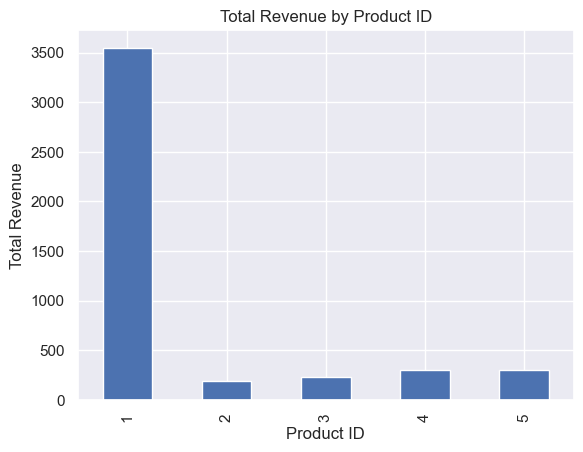

In [40]:
# Plotting a graph
plt.figure(figsize=(5, 2))

df.plot(kind='bar', x='P_ID', y='total_revenue', legend=False)

plt.title('Total Revenue by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')


plt.savefig('task_7_summary.png')
print("Sales chart saved as 'task_7_summary.png'")

conn.close()